In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tichumania_game_scraper import GenCombWeights

# Looking at Weights

In [3]:
weights = pd.read_csv("./weights_12657951.csv")

In [4]:
weights.dtypes

length           int64
type            object
comblength       int64
height         float64
probability    float64
dtype: object

In [5]:
weights['comb'] = weights['type'].map(str) + "_" + weights['comblength'].map(str) + "_" + weights['height'].map(str)

In [6]:
weights.head()

,length,type,comblength,height,probability,comb
0,5,Single,1,12.0,0.053594,Single_1_12.0
1,5,Single,1,7.0,0.037673,Single_1_7.0
2,5,Single,1,4.0,0.037908,Single_1_4.0
3,5,Trio,3,7.0,0.003395,Trio_3_7.0
4,5,Pair,2,7.0,0.014162,Pair_2_7.0


In [7]:
w1 = weights[weights.length == 1]
w2 = weights[weights.length == 2]
w3 = weights[weights.length == 3]
w4 = weights[weights.length == 4]
w5 = weights[weights.length == 5]
w6 = weights[weights.length == 6]
w7 = weights[weights.length == 7]
w8 = weights[weights.length == 8]
w9 = weights[weights.length == 9]
w10 = weights[weights.length == 10]
w11 = weights[weights.length == 11]
w12 = weights[weights.length == 12]
w13 = weights[weights.length == 13]
w14 = weights[weights.length == 14]

In [35]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10), # length, height
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [42]:
def plot_all_types_for_length(length):
    plt.nipy_spectral()  # set colormap
    W = weights[weights.length == length]
    for type_ in ['Single', 'Pair', 'Trio', 'SquareBomb', 'FullHouse', 'PairSteps', 'Straight', 'StraightBomb']:
        W_type = W[W['type'] == type_]
        if len(W_type):
            plt.plot(W_type['height'], W_type['probability'], 'o', label=type_)
    plt.legend(loc='upper left')
    plt.ylabel('probability')
    plt.xlabel('combination height')
    plt.title("{} Handcards".format(length), fontsize=22)
    
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    xlabels = ['\nDog', 'MahJong', '\nPhoenix', '2', '3', '4', '5', '6', '7', '8', '9', '10',
               'J', 'Q', 'K', 'A', 'Dragon']
    xpos = list(range(len(xlabels)-1))
    xpos.insert(2, 1.5) # insert the phoenix (1.5 at position 2)

    plt.xticks(xpos, xlabels, rotation=0)

def plot_all_lengths_for_type(type_):
    W = weights[weights.type == type_]
    for l in range(1, 15):
        W_len = W[W['length'] == l]
        pp = 'o' if l <= 5 else '.'
        plt.plot(W_len['height'], W_len['probability'], pp, label=l)
    plt.legend(loc='upper left')
    plt.title(str(t), fontsize=22)
    plt.ylabel('probability')
    plt.xlabel('combination height')
    xlabels = ['\nDog', 'MahJong', '\nPhoenix', '2', '3', '4', '5', '6', '7', '8', '9', '10',
               'J', 'Q', 'K', 'A', 'Dragon']
    xpos = list(range(len(xlabels)-1))
    xpos.insert(2, 1.5) # insert the phoenix (1.5 at position 2)
    plt.xticks(xpos, xlabels, rotation=0)

/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


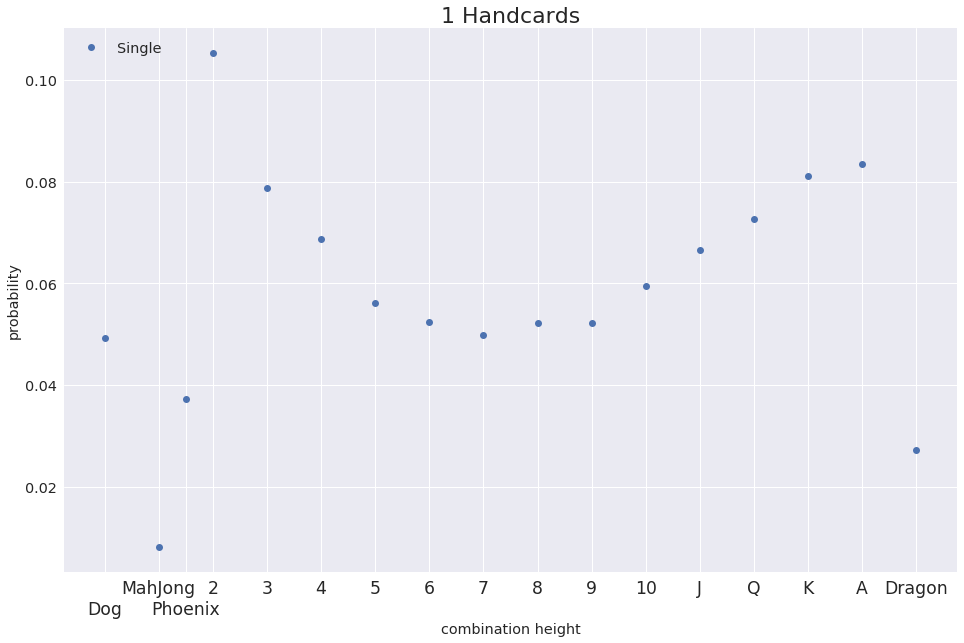

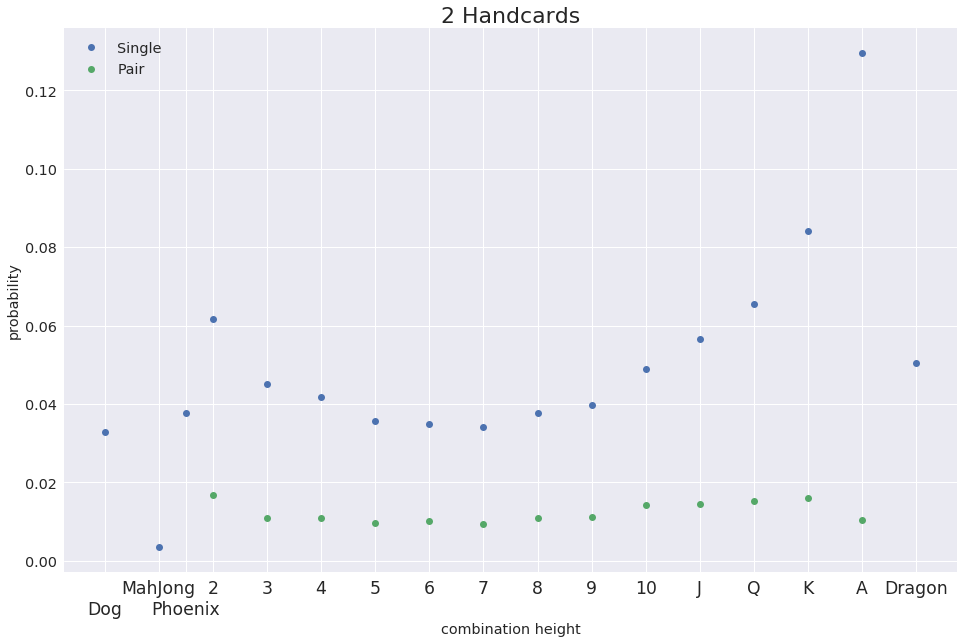

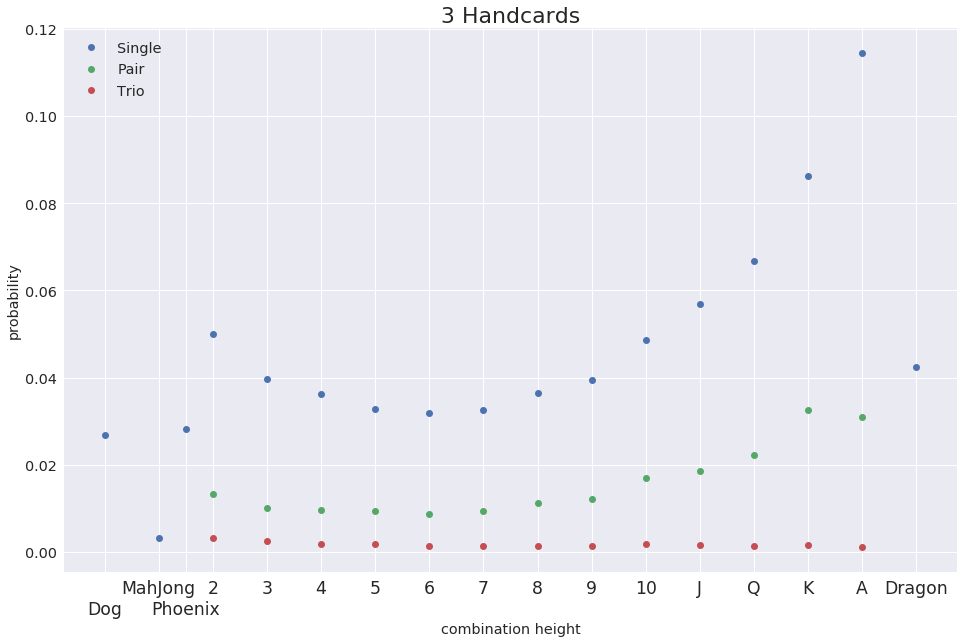

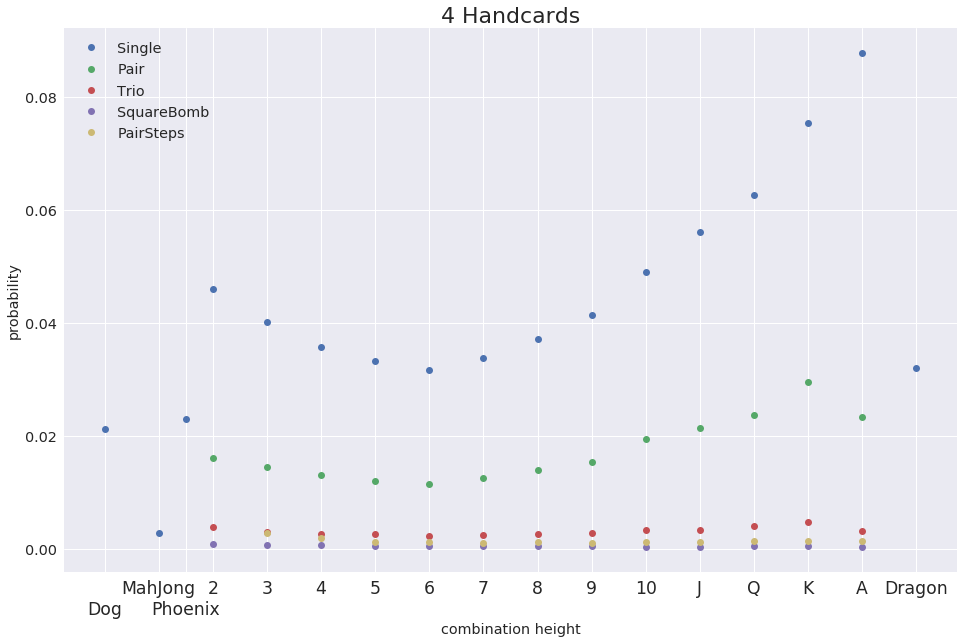

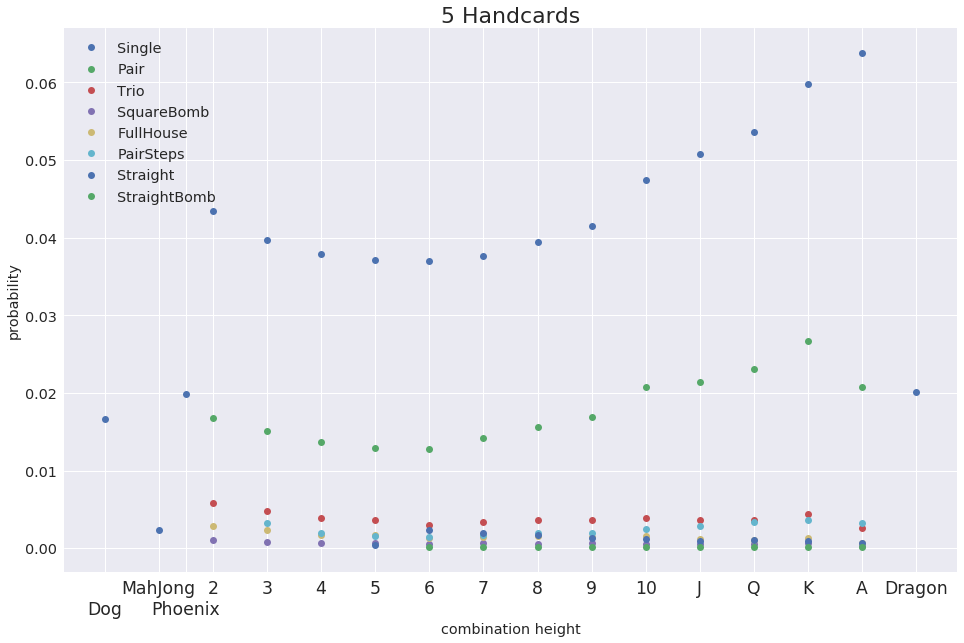

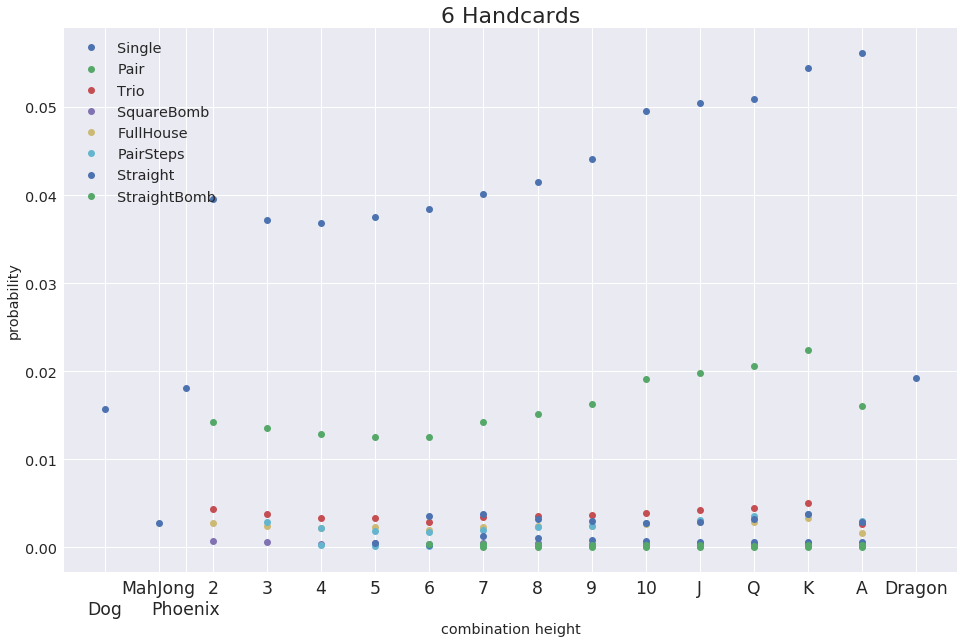

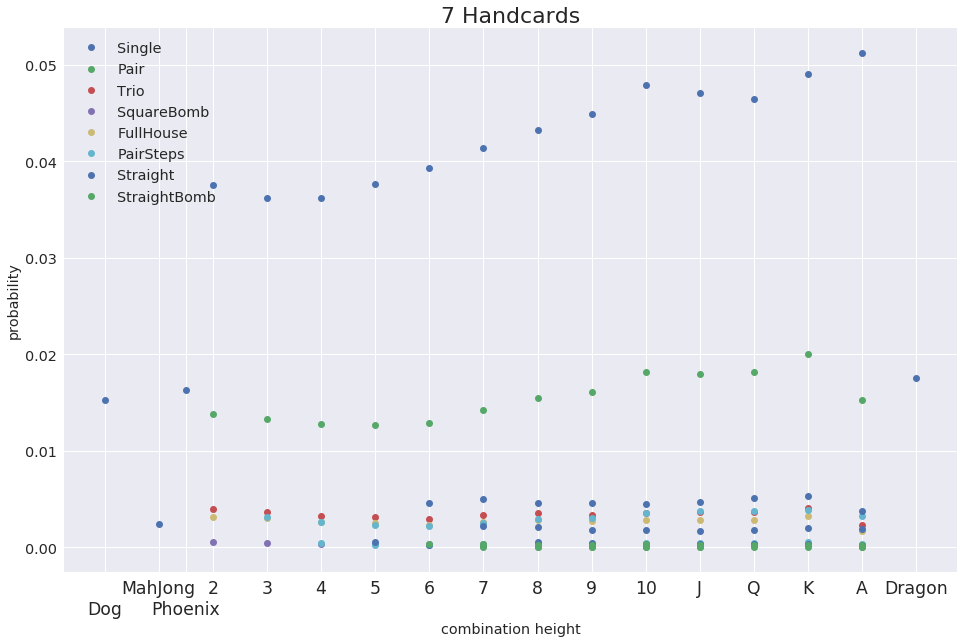

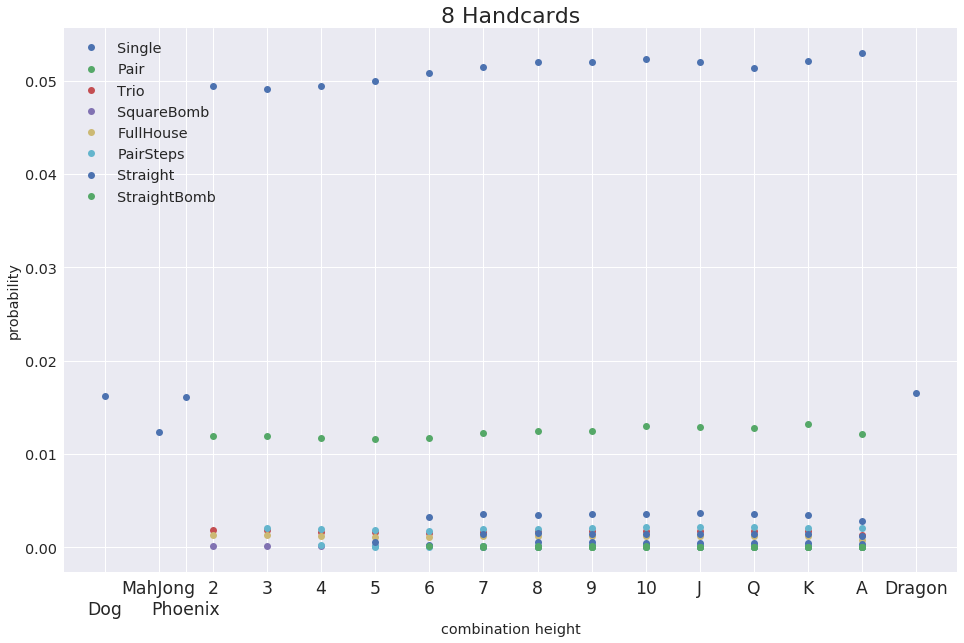

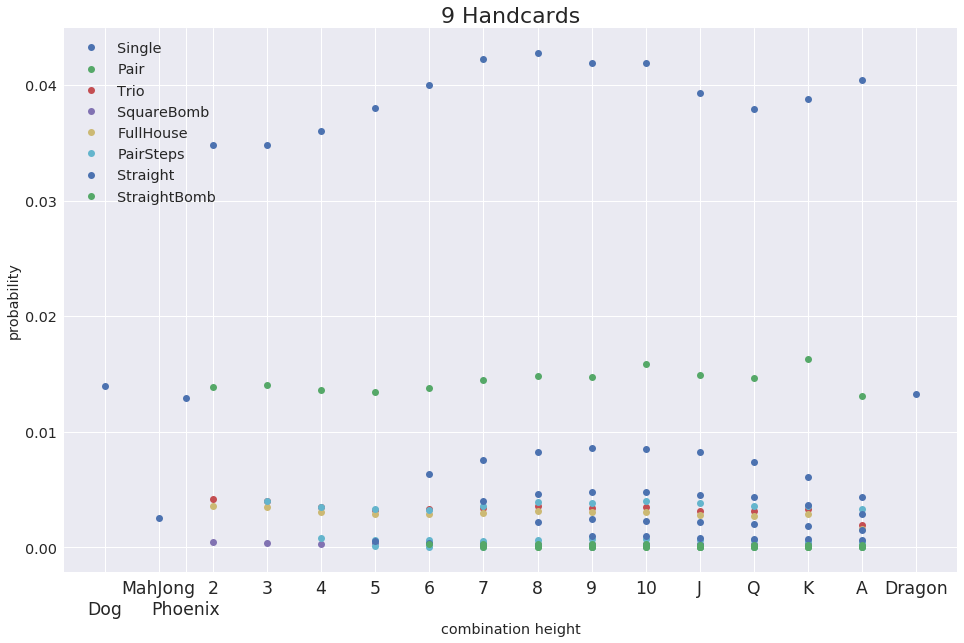

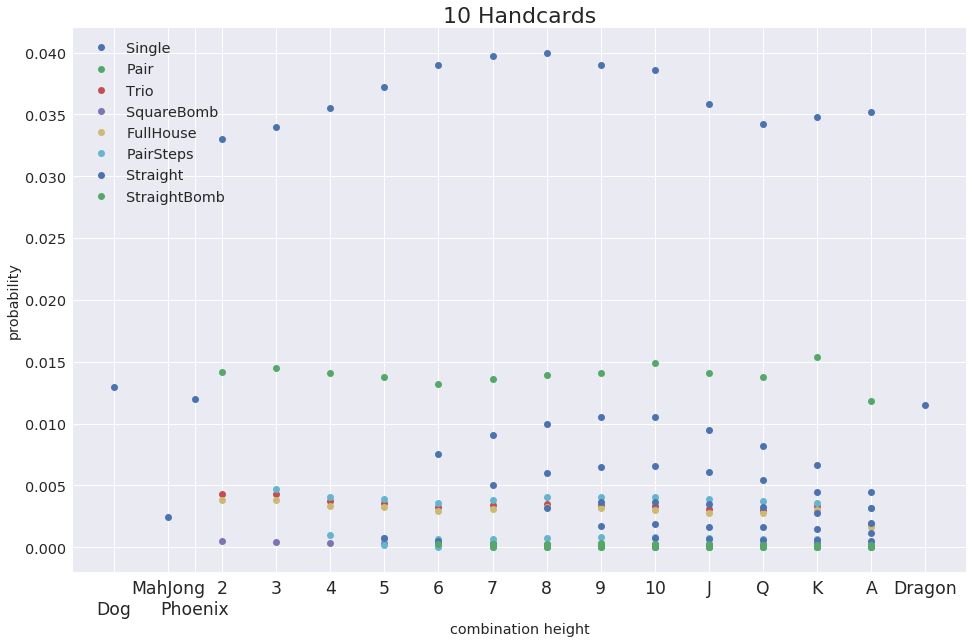

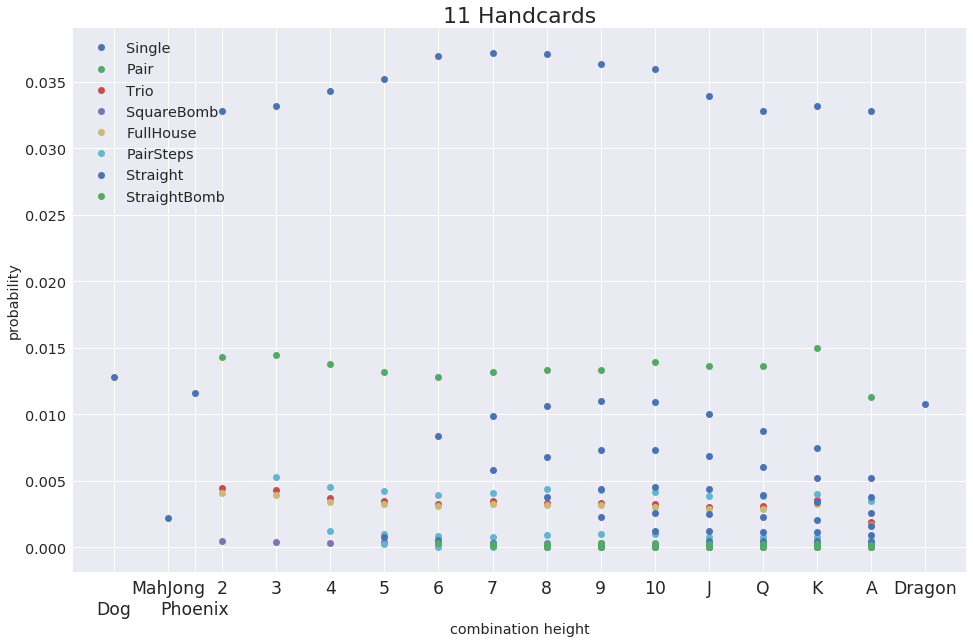

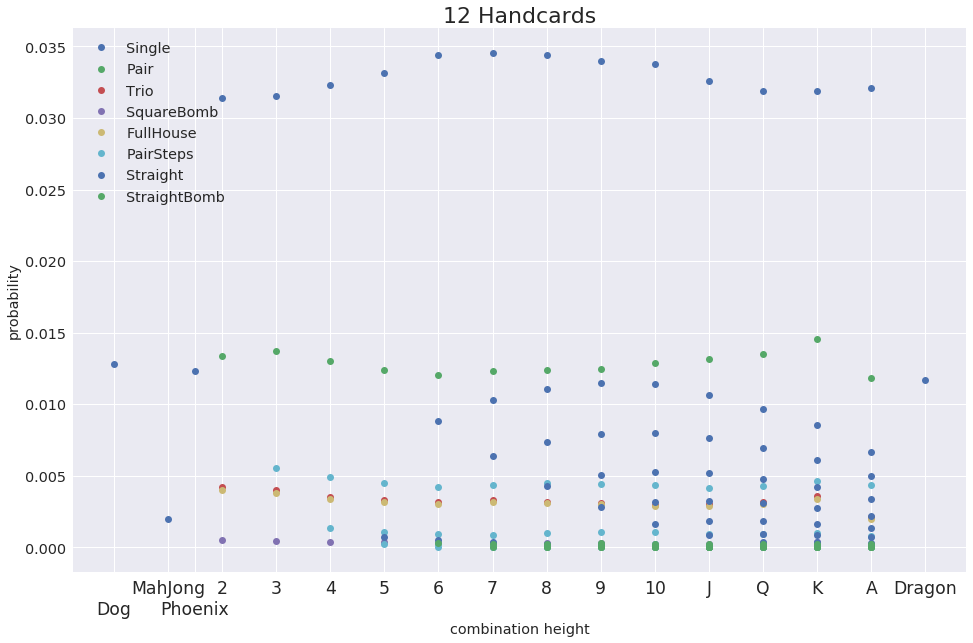

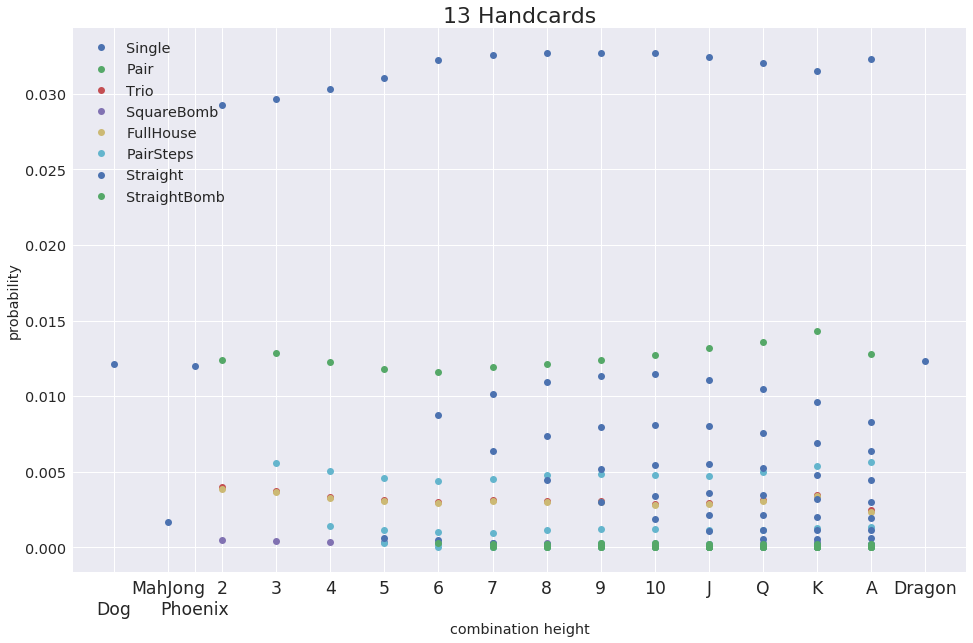

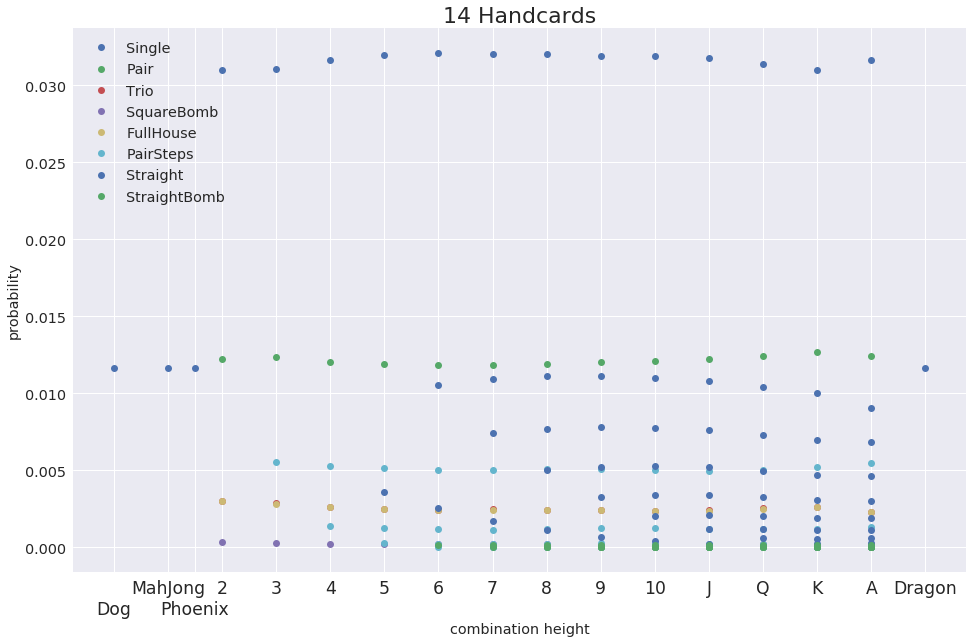

In [37]:
for l in range(1, 15):
    plot_all_types_for_length(l)
    plt.savefig("./figures/type_for_len_{}.png".format(l))
    plt.show()

/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


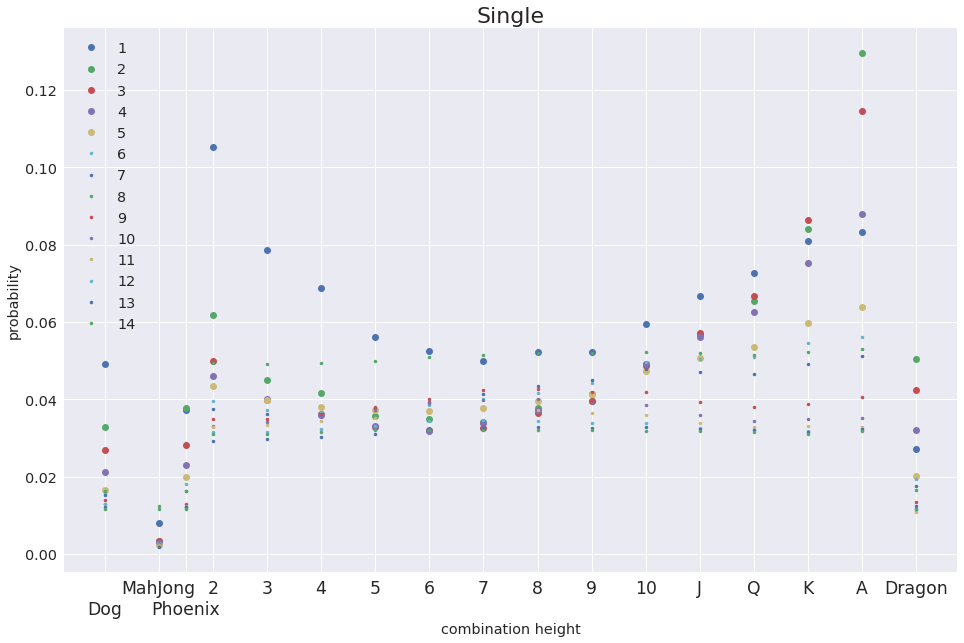

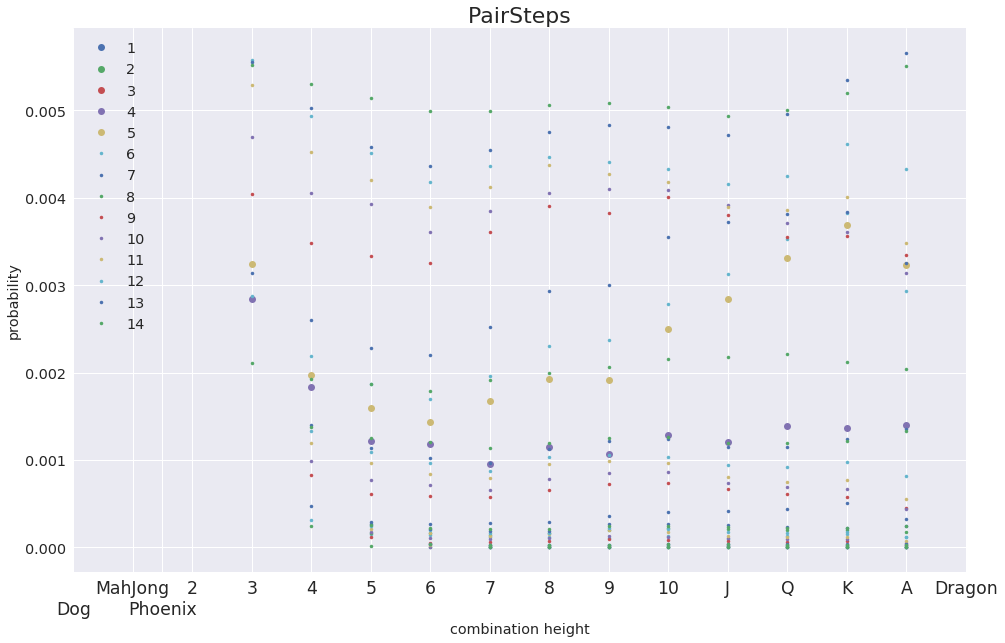

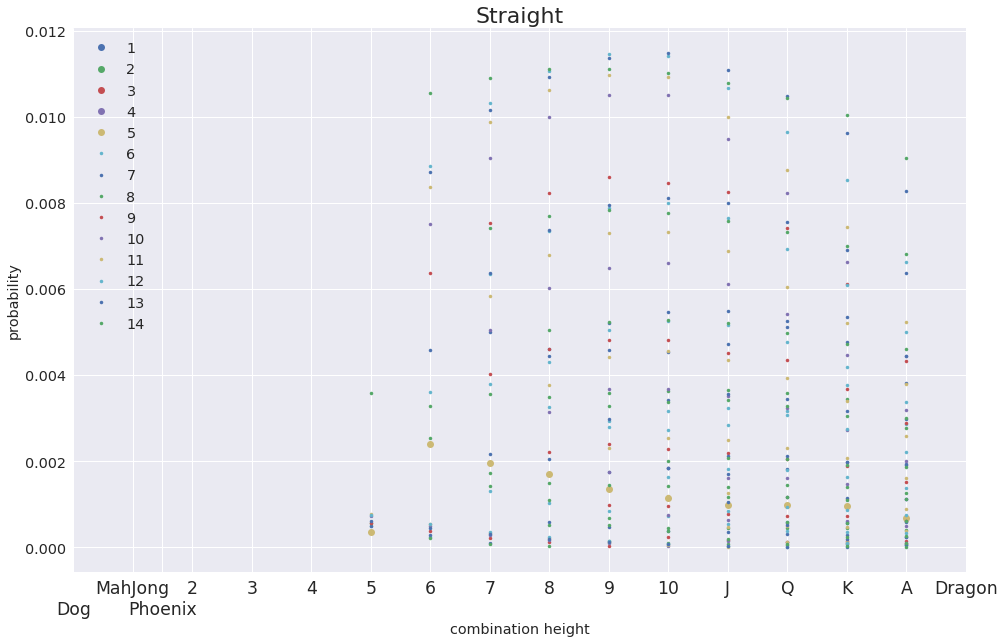

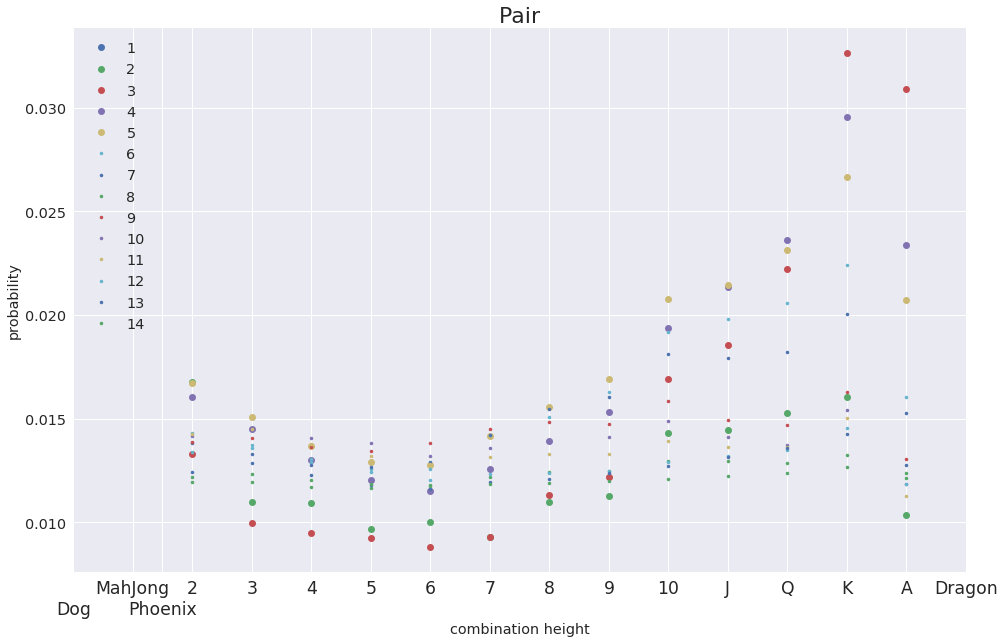

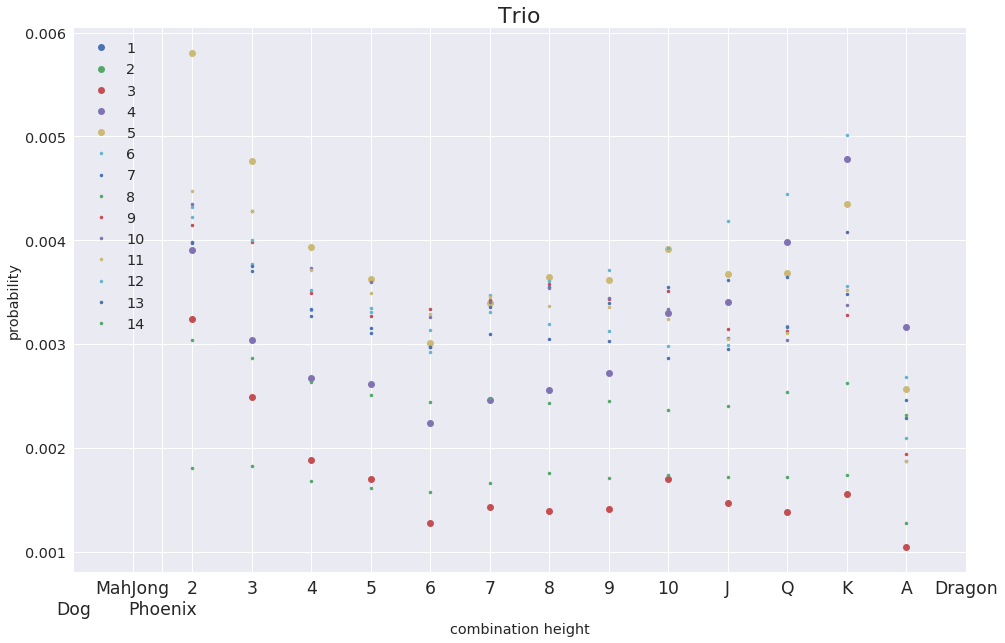

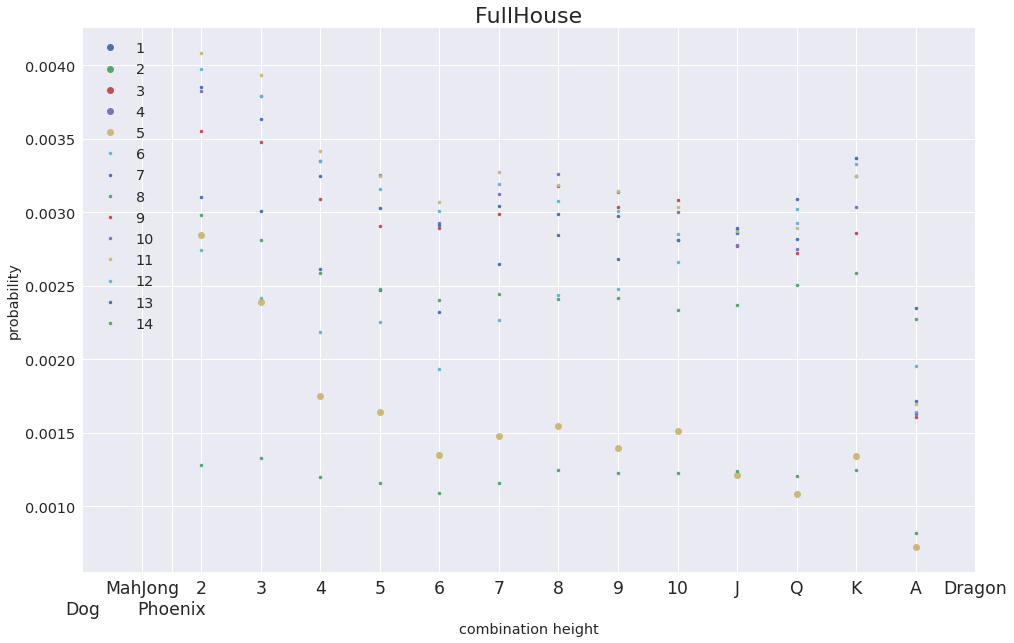

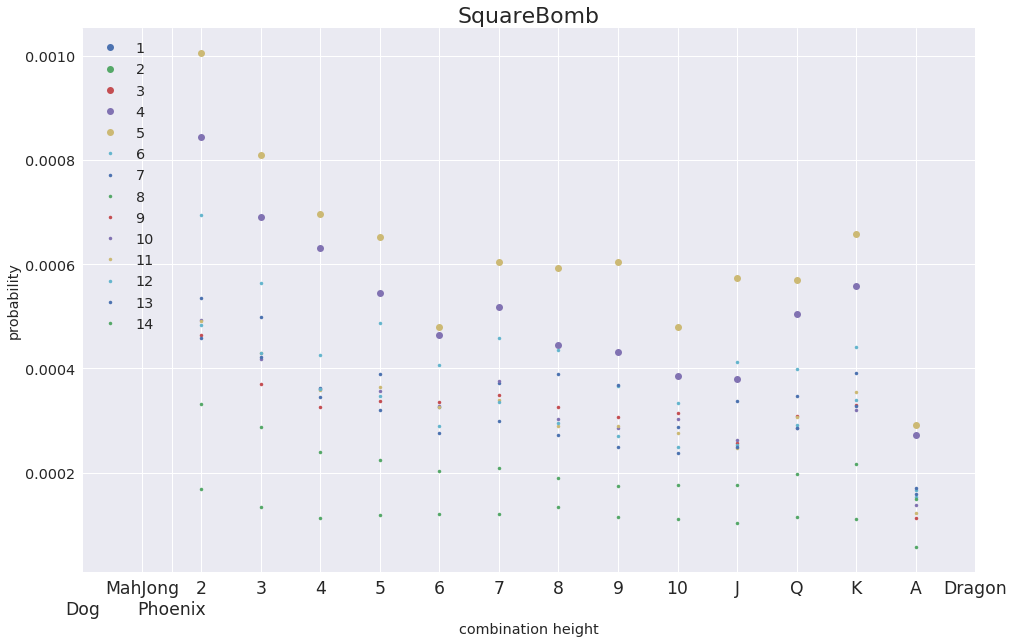

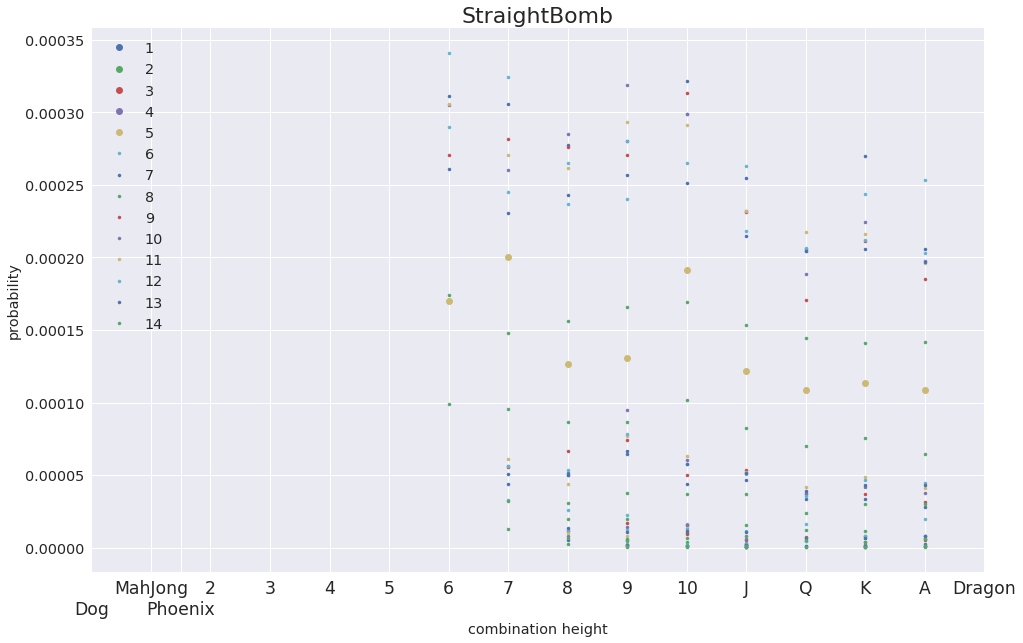

In [43]:
for t in w14.type.unique():
    plot_all_lengths_for_type(t)
    plt.show()